# Average firing rate

In [1]:
from typing import Tuple

import seaborn as sns
import matplotlib.pyplot as plt

from param import *
from dataloader import UniformSegmentDataset, BaseDataset

data_list = ParamDir().data_list

## KO

Text(0.5, 0.98, 'average firing rate added across neurons')

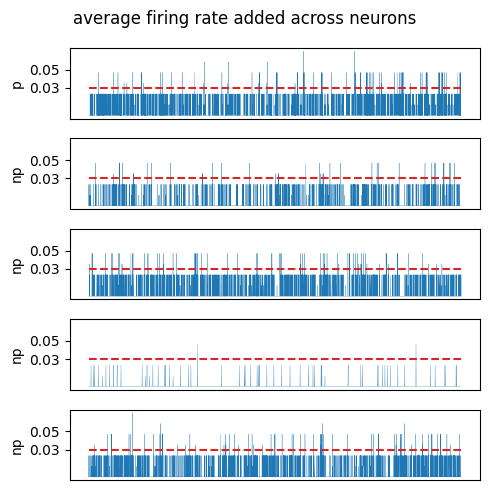

In [2]:
# mouse_name = "091317 OF CaMKII HKO M19-n1" # KO that passed the test
# data_dir = ParamDir().DATA_ROOT / mouse_name
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in  str(data_dir).split('/')[-1]]
fig, axes = plt.subplots(figsize=(5,5), nrows=len(KO_data_list), tight_layout = True, sharey=True)
for i, data_dir in enumerate(KO_data_list):
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)
    avg_fr = np.vstack(X_train).mean(axis=1) * 3/ParamData().window_size # average firing rate, unit spikes/s

    axes[i].plot(avg_fr, lw=.2)
    axes[i].hlines([0.03], 0, len(avg_fr), colors="tab:red", linestyles= 'dashed',)
    
    axes[i].set_yticks([0.03, 0.05])
    axes[i].set_xticks([])
    axes[i].set_xticks([], minor=True)
    if data_name == "091317 OF CaMKII HKO M19-n1":
        # axes[i].set_title(f"passed: {spikes_sum}")
        axes[i].set_ylabel(f"p")
    else:
        # axes[i].set_title(f"didnot pass: {spikes_sum}")
        axes[i].set_ylabel(f"np")

plt.suptitle("average firing rate added across neurons")

Text(0.5, 0, 'permutation test')

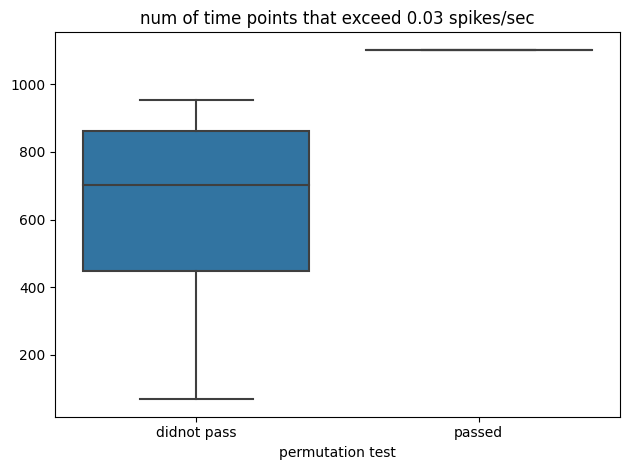

In [3]:
fig, ax = plt.subplots( tight_layout = True, sharey=True)

pass_res = []
not_pass_res = []
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in  str(data_dir).split('/')[-1]]
for i, data_dir in enumerate(KO_data_list):
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)
    avg_fr = np.vstack(X_train).mean(axis=1)
    # spikes_sum = dataset.spikes[:int(len(dataset.spikes)*ParamData().train_ratio)].sum()
    if data_name in ["091317 OF CaMKII HKO M19-n1"]:
        # axes[i].set_title(f"passed: {spikes_sum}")
        pass_res.append([sum(avg_fr>0.03), data_name])
    else:
        not_pass_res.append([sum(avg_fr>0.03), data_name])

sns.boxplot([[i[0] for i in not_pass_res], [i[0] for i in pass_res]], ax=ax)
plt.title("num of time points that exceed 0.03 spikes/sec")
ax.set_xticklabels(["didnot pass", "passed"])
plt.xlabel("permutation test")

In [4]:
print(f"passed: \n {pass_res} \ndidnot pass: \n {not_pass_res}")

passed: 
 [[1102, '091317 OF CaMKII HKO M19-n1']] 
didnot pass: 
 [[574, '092217 OF CaMKII HKO M30-n1'], [954, '091317 OF CaMKII HKO M20-n1'], [69, 'CK_KO_RN1_OF'], [832, '090817 OF CaMKII HKO M22-n1']]


## WT

Text(0.5, 0.98, 'average firing rate added across neurons')

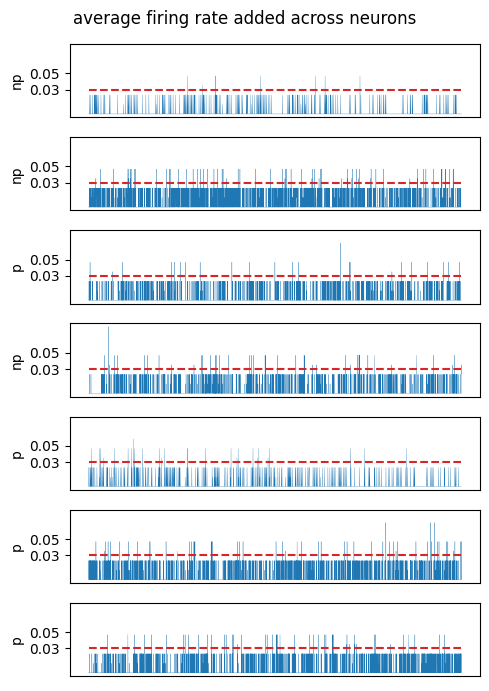

In [5]:
WT_names = ["M45_042718_OF", "M46_042718_OF", "092217 OF CaMKII WT M29-n1"]
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in  str(data_dir).split('/')[-1]]
fig, axes = plt.subplots(figsize=(5,7), nrows=len(WT_data_list), tight_layout = True, sharey=True)
for i, data_dir in enumerate(WT_data_list):
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)
    avg_fr = np.vstack(X_train).mean(axis=1) * 3/ParamData().window_size # average firing rate, unit spikes/s

    axes[i].plot(avg_fr, lw=.2)
    axes[i].hlines([0.03], 0, len(avg_fr), colors="tab:red", linestyles= 'dashed',)
    
    axes[i].set_yticks([0.03, 0.05])
    axes[i].set_xticks([])
    axes[i].set_xticks([], minor=True)
    if data_name not in WT_names:
        # axes[i].set_title(f"passed: {spikes_sum}")
        axes[i].set_ylabel(f"p")
    else:
        # axes[i].set_title(f"didnot pass: {spikes_sum}")
        axes[i].set_ylabel(f"np")

plt.suptitle("average firing rate added across neurons")

Text(0.5, 0, 'permutation test')

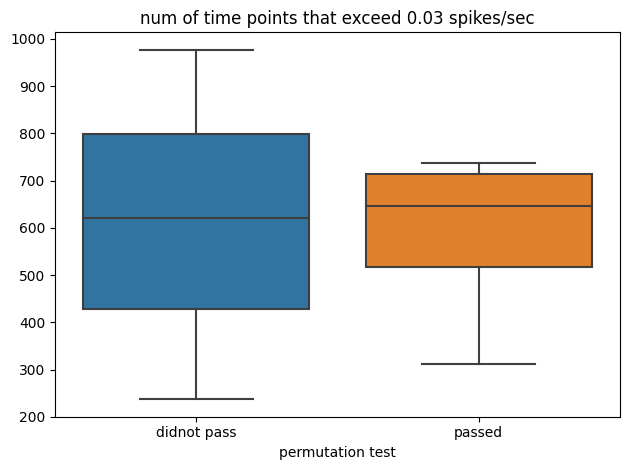

In [6]:
fig, ax = plt.subplots( tight_layout = True, sharey=True)

pass_res = []
not_pass_res = []
WT_names = ["M45_042718_OF", "M46_042718_OF", "092217 OF CaMKII WT M29-n1"]
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in  str(data_dir).split('/')[-1]]
for i, data_dir in enumerate(WT_data_list):
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)
    avg_fr = np.vstack(X_train).mean(axis=1)
    # spikes_sum = dataset.spikes[:int(len(dataset.spikes)*ParamData().train_ratio)].sum()
    if data_name not in WT_names:
        # axes[i].set_title(f"passed: {spikes_sum}")
        pass_res.append([sum(avg_fr>0.03), data_name])
    else:
        not_pass_res.append([sum(avg_fr>0.03), data_name])

sns.boxplot([[i[0] for i in not_pass_res], [i[0] for i in pass_res]], ax=ax)
plt.title("num of time points that exceed 0.03 spikes/sec")
ax.set_xticklabels(["didnot pass", "passed"])
plt.xlabel("permutation test")

In [7]:
print(f"passed: \n {pass_res} \ndidnot pass: \n {not_pass_res}")

passed: 
 [[586, 'CK_WT_RN3_OF'], [312, 'M44_042718_OF'], [737, '092717 OF SERT WT M32-n1'], [707, '081117 OF B6J M27-n1']] 
didnot pass: 
 [[237, 'M45_042718_OF'], [977, 'M46_042718_OF'], [620, '092217 OF CaMKII WT M29-n1']]
